##### In this lab assignment, there is (simulated) data on the lengths and widths of Pichus and Pikachus. I have created an algorithm that, based on the given data, should be able to determine whether the data is classified as Pichu or Pikachu. I have received assistance from ChatGPT, YouTube, and W3Schools.

This code reads the content from a text file containing text about Pikachu, then cleans and formats the text by removing excess whitespace, capitalizing each sentence, and separating them with new lines.

In [ ]:
import re

# Specify the path to your text file pichu.txt
pichu1_path = "../data/pikachu1.txt"  

# Open and read the text file
with open(pichu1_path, "r") as file:
    raw_text = file.read()

# Print the raw text
print(raw_text)

# Fix spacing in the text
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Capitalize each sentence and split them
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Merge the sentences with new lines
cleaned_text = ".\n".join(text_list)

# Print the cleaned text
print()
print(cleaned_text)

# Open a new txt file and write the content of cleaned_text
with open("../data/cleaned_pikachu1.txt", "w") as file:
    file.write(cleaned_text)

In [ ]:
import re

# Specify the path to your text file pichi.txt
pichu1_path = "../data/pichu1.txt"  

# Open and read the text file
with open(pichu1_path, "r") as file:
    raw_text = file.read()

# Print the raw text
print(raw_text)

# Fix spacing in the text
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Capitalize each sentence and split them
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Merge the sentences with new lines
cleaned_text = ".\n".join(text_list)

# Print the cleaned text
print()
print(cleaned_text)

# Open a new txt file and write the content of cleaned_text
with open("../data/cleaned_pichu1.txt", "w") as file:
    file.write(cleaned_text)

In [ ]:
with open("../data/test_points.txt" , "r") as file:
    raw = file.read()

print (raw)

This code loads data from two text files containing information about Pichu and Pikachu, then plots this data with different colors to represent Pichu and Pikachu.
After that, it prompts the user to input a test point by specifying its width and height, and plots it along with the other data points. Finally, it classifies the test point by calculating its nearest neighbors using a k-nearest neighbors algorithm and determining the majority class among the nearest neighbors.

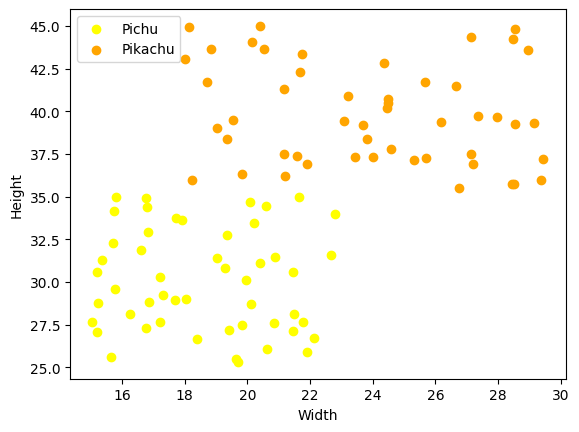

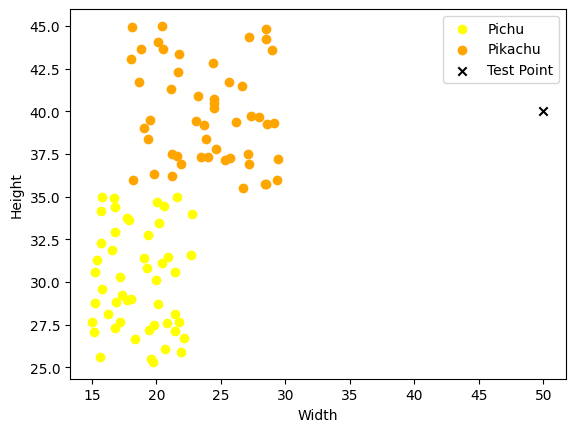

Your width and height are [50. 40.]. It classified as: Pikachu


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# loads the data from the .txt file
def load_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            try:
                # Strip potential parentheses and whitespace, then split by comma
                line = line.strip().replace('(', '').replace(')', '')
                width, height = map(float, line.split(','))
                data.append([width, height])
            except ValueError as e:
                print(f"Error on line: {line}. Error: {e}")
    return np.array(data)

# Load Pichu and Pikachu data
pichu_data = load_data('../data/pichu1.txt')  
pikachu_data = load_data('../data/pikachu1.txt')


# This function is used to plot Pichu and Pikachu data points in different colors
def plot_data(pichu, pikachu, test_point=None):
    plt.scatter(pichu[:, 0], pichu[:, 1], c='yellow', label='Pichu')
    plt.scatter(pikachu[:, 0], pikachu[:, 1], c='orange', label='Pikachu')
    if test_point is not None:
        plt.scatter(test_point[0], test_point[1], c='black', marker='x', label='Test Point')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend()
    plt.show()

plot_data(pichu_data, pikachu_data)

# This function prompts the user for a test point and handles invalid input
def input_test_point():
    while True:
        try:
            width = float(input("Enter width: "))
            height = float(input("Enter height: "))
            if width < 0 or height < 0:
                raise ValueError("Dimensions must be non-negative.")
            return np.array([width, height])
        except ValueError as e:
            print(f"Invalid input: {e}. Please enter positive numeric values.")


# This function calculates the Euclidean distance between two points
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# This function is used to determine the nearest points
def classify_test_point(training_data, test_point, k=5):
    distances = np.array([calculate_distance(test_point, data_point) for data_point in training_data])
    # Find the k nearest points
    nearest_indices = np.argsort(distances)[:k]
    pichu_count = np.sum(nearest_indices < len(pichu_data))
    pikachu_count = k - pichu_count
    return 'Pichu' if pichu_count > pikachu_count else 'Pikachu'

# Combining Pichu and Pikachu data for the classification
combined_data = np.vstack((pichu_data, pikachu_data))


# Input a test point
test_point = input_test_point()

# Plotta data med testpunkten
plot_data(pichu_data, pikachu_data, test_point)

# Classify the test point
classification_result = classify_test_point(combined_data, test_point)
print(f"Your width and height are {test_point }. It classified as: {classification_result}")